In [1]:
library(tidyverse)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.8
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



In [3]:
as_tibble(iris) %>% head()

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [4]:
tibble(
x = 1:5,
y = 1,
z = x ^ 2 + y
)

x,y,z
<int>,<dbl>,<dbl>
1,1,2
2,1,5
3,1,10
4,1,17
5,1,26


In [7]:
tb <- tibble(
':)' = '스마일',
' ' = '스페이스',
'2000' = '숫자') %>% print()

# A tibble: 1 x 3
  `:)`   ` `      `2000`
  <chr>  <chr>    <chr> 
1 스마일 스페이스 숫자  


In [8]:
tribble(
~x, ~y, ~z,
#--|--|----
"a", 2, 3.6,
"b", 1, 8.5
)

x,y,z
<chr>,<dbl>,<dbl>
a,2,3.6
b,1,8.5


### 티블 vs 데이터프레임

In [10]:
tibble(
a = lubridate::now() + runif(1e3) * 86400,
b = lubridate::today() + runif(1e3) + 30,
c = 1:1e3,
d = runif(1e3),
e = sample(letters, 1e3, replace = T)) %>% head()

a,b,c,d,e
<dttm>,<date>,<int>,<dbl>,<chr>
2022-03-29 13:30:26,2022-04-27,1,0.5243632,n
2022-03-29 08:37:58,2022-04-27,2,0.9836041,c
2022-03-29 20:14:38,2022-04-27,3,0.3928933,h
2022-03-29 04:18:24,2022-04-27,4,0.7547238,l
2022-03-29 10:17:39,2022-04-27,5,0.4947541,x
2022-03-29 18:31:25,2022-04-27,6,0.9212808,v


In [12]:
nycflights13::flights %>% 
print(n = 10, width = Inf) # 10개의 행과, 모든 열을 표시

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
   arr_delay carrier flight

In [19]:
df = tibble(
x = runif(5),
y = rnorm(5)) %>% print()

# A tibble: 5 x 2
      x      y
  <dbl>  <dbl>
1 0.491  0.115
2 0.237  1.74 
3 0.870  0.871
4 0.711 -0.963
5 0.698  1.32 


In [23]:
df$x ; df[,1]

[1] 0.4914868 0.2370840 0.8701956 0.7106541 0.6984712

x
<dbl>
0.4914868
0.2370840
0.8701956
0.7106541
0.6984712


In [24]:
df %>% .$x

[1] 0.4914868 0.2370840 0.8701956 0.7106541 0.6984712

In [32]:
# 7.4.1
# 1
class(mtcars); class(tibble(mtcars)); is_tibble(mtcars)

[1] "data.frame"

[1] "tbl_df"     "tbl"        "data.frame"

[1] FALSE

In [33]:
# 2
df <- data.frame(abc = 1, xyz = "a")
df

abc,xyz
<dbl>,<chr>
1,a


In [34]:
df$x ; df[, 'xyz']; df[, c('abc', 'xyz')]

[1] "a"

[1] "a"

abc,xyz
<dbl>,<chr>
1,a


[1]  1  2  3  4  5  6  7  8  9 10

Warning message:
"Use of `annoying$"1"` is discouraged. Use `1` instead."
Warning message:
"Use of `annoying$"2"` is discouraged. Use `2` instead."


one,two,three
<int>,<dbl>,<dbl>
1,2.175752,2.175752
2,2.287333,1.143666
3,3.920901,1.306967
4,8.834920,2.208730
5,10.460144,2.092029
6,11.881979,1.980330
7,12.980504,1.854358
8,17.348886,2.168611
9,16.868044,1.874227


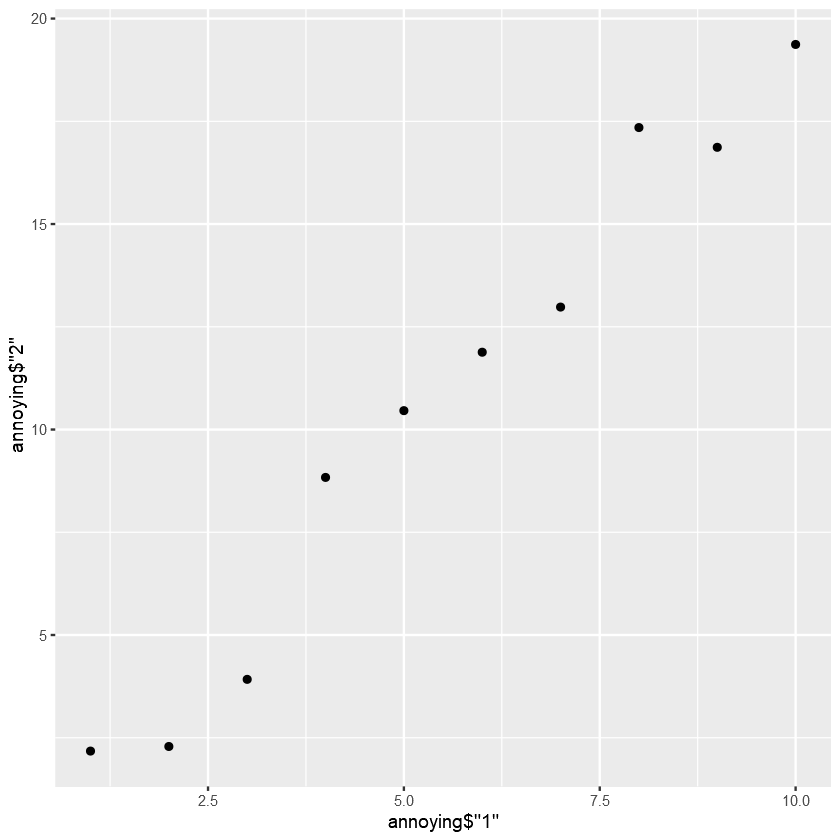

In [54]:
# 3
annoying <- tibble(
  `1` = 1:10,
  `2` = `1` * 2 + rnorm(length(`1`))
)
annoying$'1'
ggplot(annoying) + geom_point(aes(annoying$'1', annoying$'2'))
annoying <- annoying %>% mutate('3' = annoying$'2' / annoying$'1')
colnames(annoying) = c('one', 'two', 'three') ; annoying

### tibble::enframe() : 명명된 벡터를 이름과 값이 있는 데이터 프레임으로 변환

In [55]:
# 5
enframe(c(a = 1, b = 2, c = 3))


name,value
<chr>,<dbl>
a,1
b,2
c,3
